# 📌 Task 2: Location-Based Analysis


**Internship:** Cognifyz Technologies  
**Intern:** Ashok R  

## Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\ashok\Downloads\Cognifyz_intern\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Step 3: Basic Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.shape

(9551, 21)

## Step 4: Drop Nulls

In [13]:
df.isnull().values.any()

np.True_

In [15]:
df.isnull().values.sum()

np.int64(9)

In [17]:
df.columns[df.isnull().any()]

Index(['Cuisines'], dtype='object')

In [19]:
df.drop(['Country Code', 'Address', 'Locality Verbose', 
         'Currency', 'Has Table booking', 'Has Online delivery', 
         'Is delivering now', 'Switch to order menu', 
         'Rating color', 'Rating text'], axis=1, inplace=True)


## Step 5: Columns Selection

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

In [23]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [25]:
df.dropna(inplace=True)


In [27]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [29]:
df.isnull().values.any()

np.False_

# Data Visualization – Geographical Analysis

## Step 6: Latitude vs Longitude (Static Map)

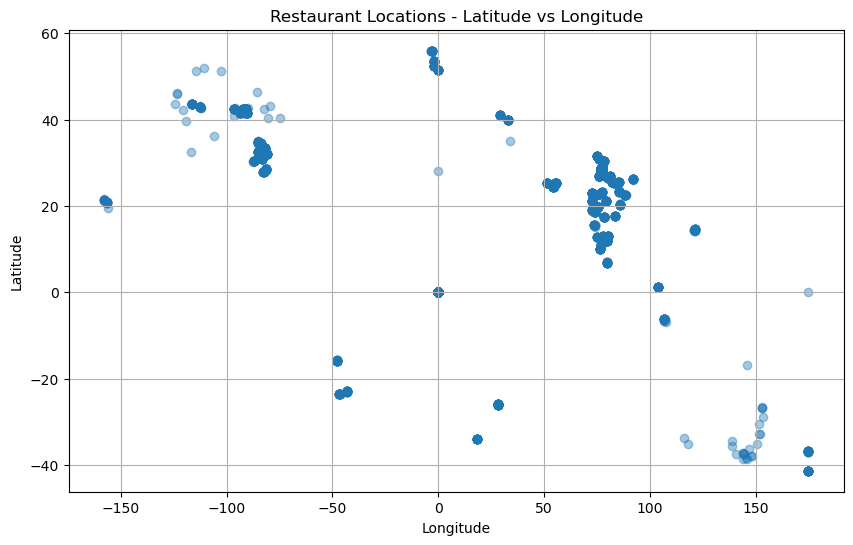

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.4)
plt.title("Restaurant Locations - Latitude vs Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## Step 7: Interactive Map by City

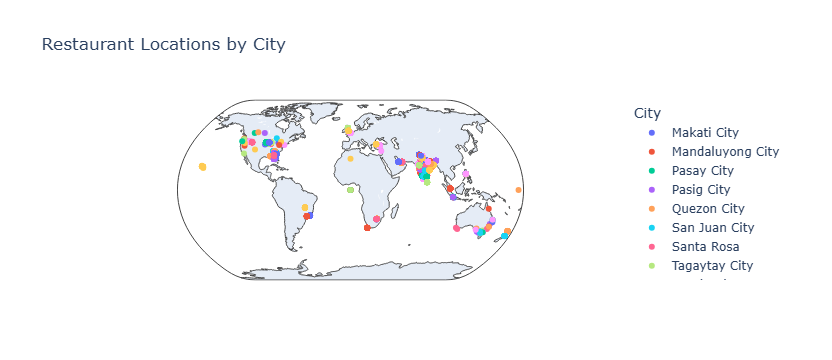

In [43]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lon='Longitude',
                     lat='Latitude',
                     #text='Restaurant Name',
                     color='City',
                     title='Restaurant Locations by City',
                     projection='natural earth')
fig.show()


# Group & Analyze by City or Locality

## Step 8: Top 10 Cities with Most Restaurants

C:\Users\ashok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



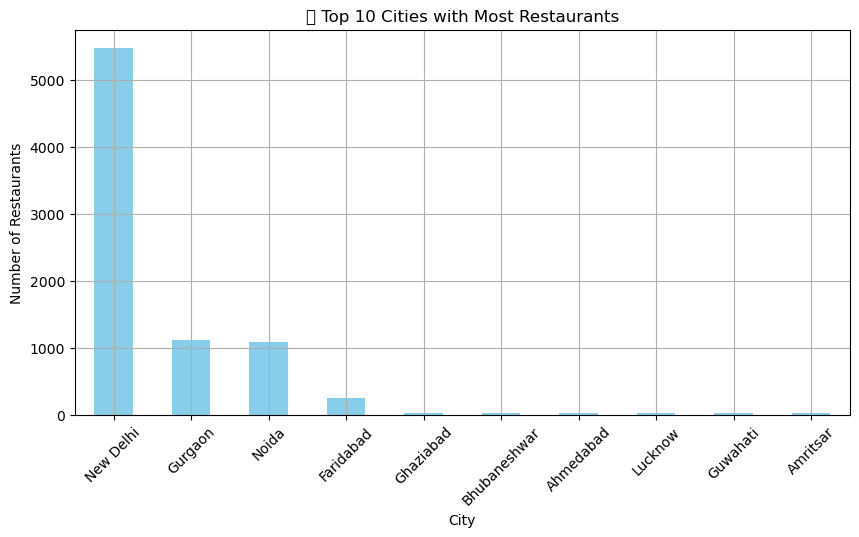

In [45]:
import matplotlib.pyplot as plt

# Count of restaurants per city
city_counts = df['City'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 5))
city_counts.plot(kind='bar', color='skyblue')
plt.title("📊 Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Step 9: Average Rating by City (Top 10)

C:\Users\ashok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



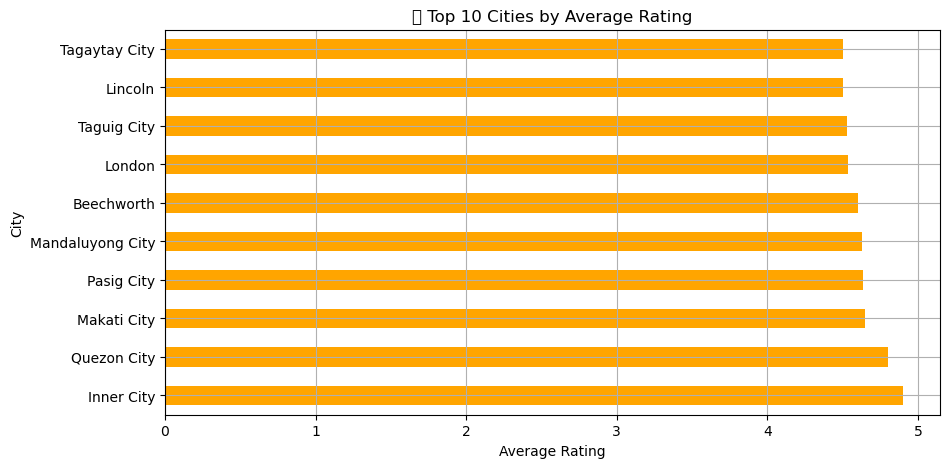

In [47]:
# Average rating per city
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Horizontal bar plot
plt.figure(figsize=(10, 5))
avg_rating_city.plot(kind='barh', color='orange')
plt.title("📈 Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.grid(True)
plt.show()


## Step 10: Average Cost for Two by City (Top 10)

C:\Users\ashok\anaconda3\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.



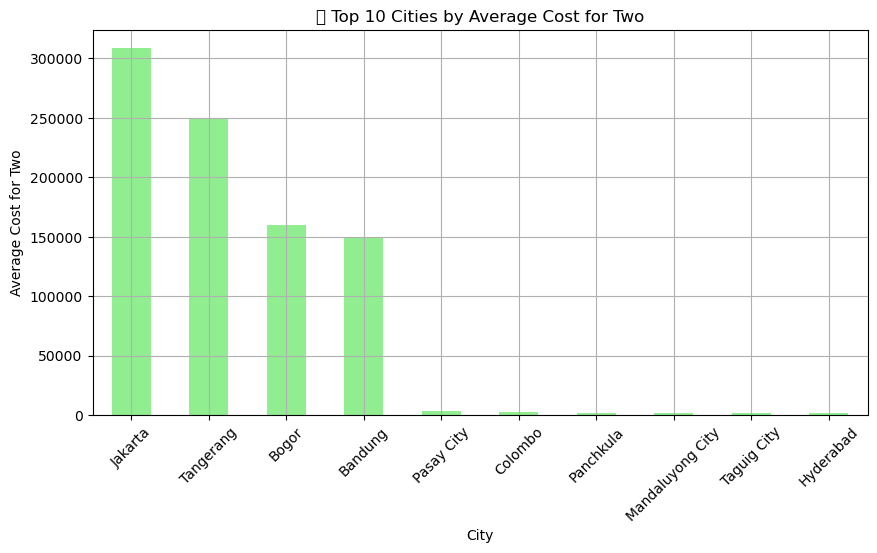

In [51]:
# Average cost per city
avg_cost_city = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 5))
avg_cost_city.plot(kind='bar', color='lightgreen')
plt.title("💸 Top 10 Cities by Average Cost for Two")
plt.xlabel("City")
plt.ylabel("Average Cost for Two")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
